In [1]:
from classes.Navigation import Navigation

navigation = Navigation('4_2_feature_inginiring_participated.ipynb')

navigation.display_header()

[Главная](./1_main.ipynb) &raquo; Отбор и преобразование признаков таблицы `data_participated`

# Отбор и преобразование признаков таблицы `data_participated`

## Оглавление
- [Загрузка данных и добавление новых признаков](#item_load)
- [Исследование распределения новых признаков в разрезе целевой переменной `deposit`](#item_distribution)
- [Исследование корреляции новых признаков](#item_correlation)
    - [Построение матрицы корреляции и диаграммы корреляции признаков с целевой переменной `deposit`](#item_correlation_by_target)
    - [Взаимосвязь признаков `has_income` и `has_credit`](#item_relation_income_credit)
    - [Взаимосвязь признаков `is_working_age` и `has_income`](#item_relation_age_income)
- [Кодирование признаков](#item_encode)
- [Отбор лучших признаков с помощью `SelectKBest`](#item_select)
- [Нормализация признаков](#item_normalize)

## Загрузка данных и добавление новых признаков <a id="item_load"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

from copy import copy

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

from classes.PrepareDataParticipated import PrepareDataParticipated

from functions.constants import TARGET_FEATURE
from functions.prepare_data import (
    get_data_with_label_encoded_columns,    
    get_samples,    
)
from functions.display_content import (
    display_relationship_features, 
    display_fields_correlation,
    display_fields_distribution_by_target,
    display_best_features,
)

In [3]:
# Загрузим данные
data_source = pd.read_csv('./data/bank_fin.csv', sep=';')

prepareData = PrepareDataParticipated(data_source)

# Добавим новые признаки
prepareData.add_new_specific_features()

data_participated = prepareData.get_data()

## Исследование распределения новых признаков в разрезе целевой переменной `deposit` <a id="item_distribution"></a>

### Признак `has_income` (имеется ли доход у клиента)

Посмотрим на распределение признака `has_income` в разрезе целевой переменной `deposit`.

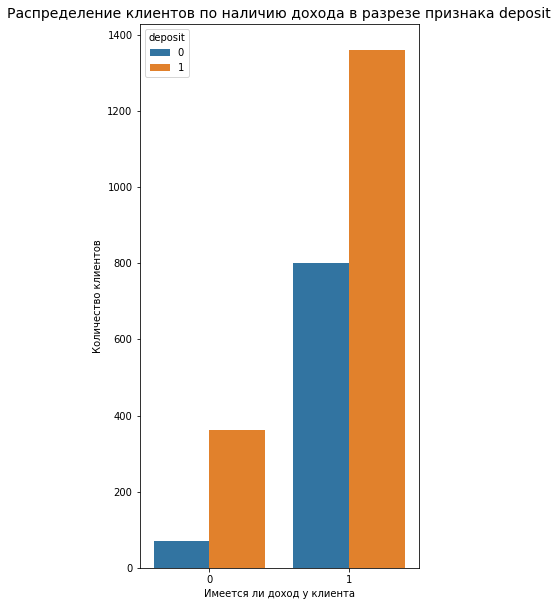

### Признак `has_credit` (имеется ли кредит у клиента)

Посмотрим на распределение признака `has_credit` в разрезе целевой переменной `deposit`.

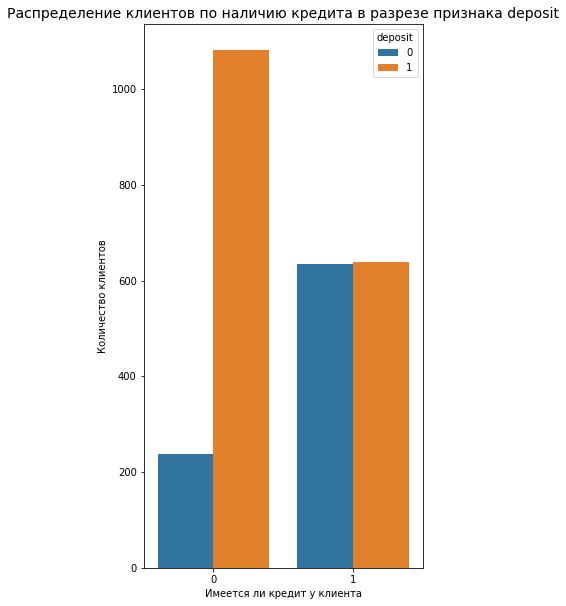

### Признак `is_debtor` (отрицательный ли баланс у клиента)

Посмотрим на распределение признака `is_debtor` в разрезе целевой переменной `deposit`.

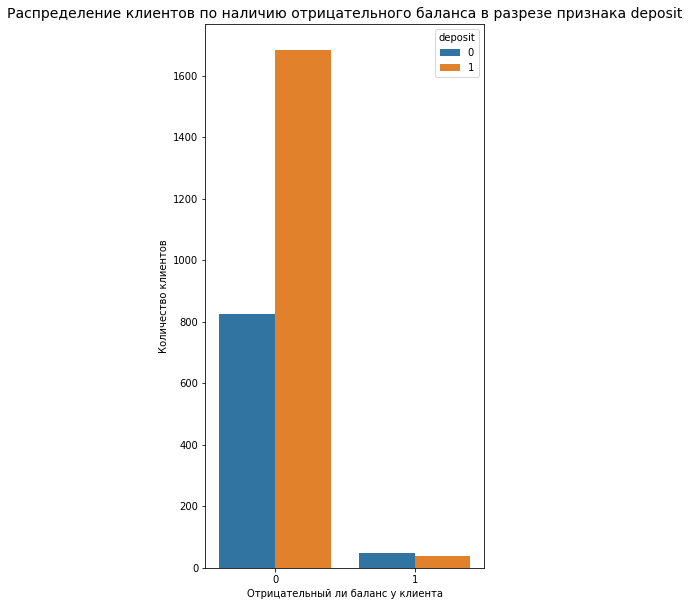

### Признак `age_scale` (шкала возраста)

Посмотрим на распределение признака `age_scale` в разрезе целевой переменной `deposit`.

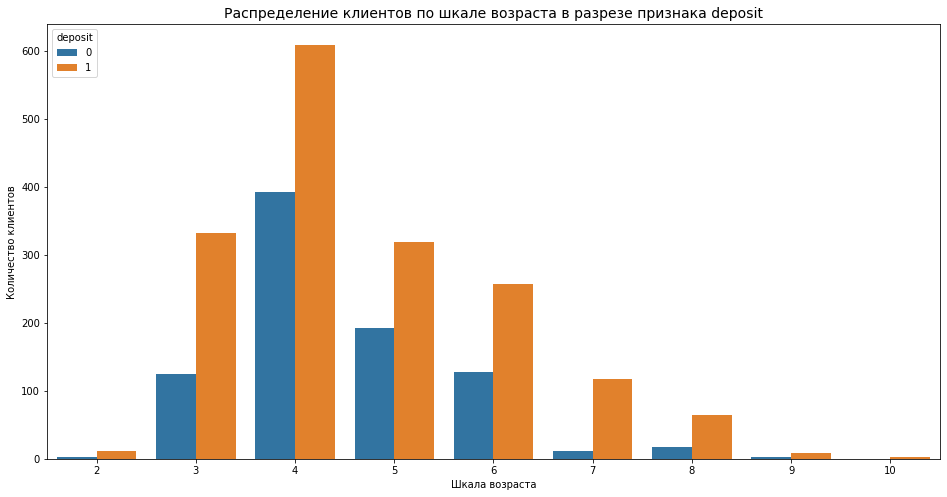

### Признак `is_working_age` (является ли возраст клиента рабочим)

Посмотрим на распределение признака `is_working_age` в разрезе целевой переменной `deposit`.

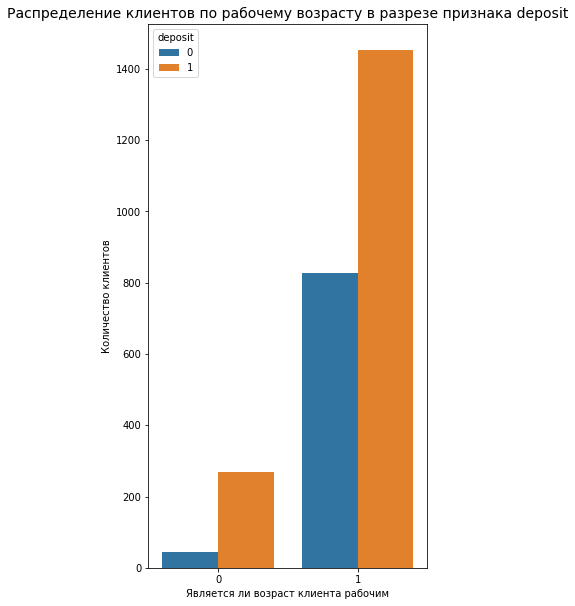

### Признак `duration_scale` (шкала длительности последнего контакта)

Посмотрим на распределение признака `duration_scale` в разрезе целевой переменной `deposit`.

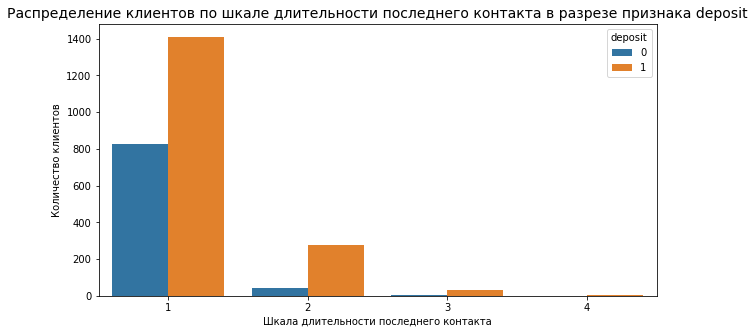

### Признак `season` (время года последнего контакта с клиентом)

Посмотрим на распределение признака `season` в разрезе целевой переменной `deposit`.

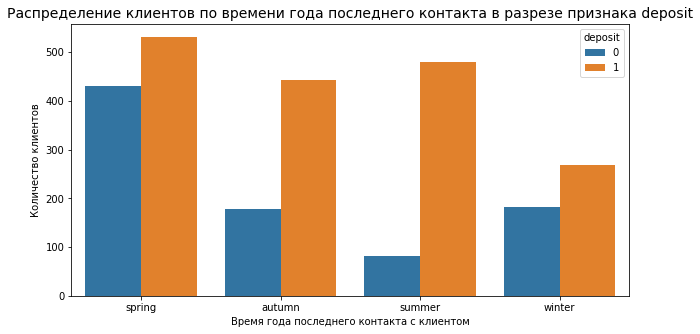

### Признак `contact_date` (дата, когда был последний контакт)

Посмотрим на распределение признака `contact_date` в разрезе целевой переменной `deposit`.

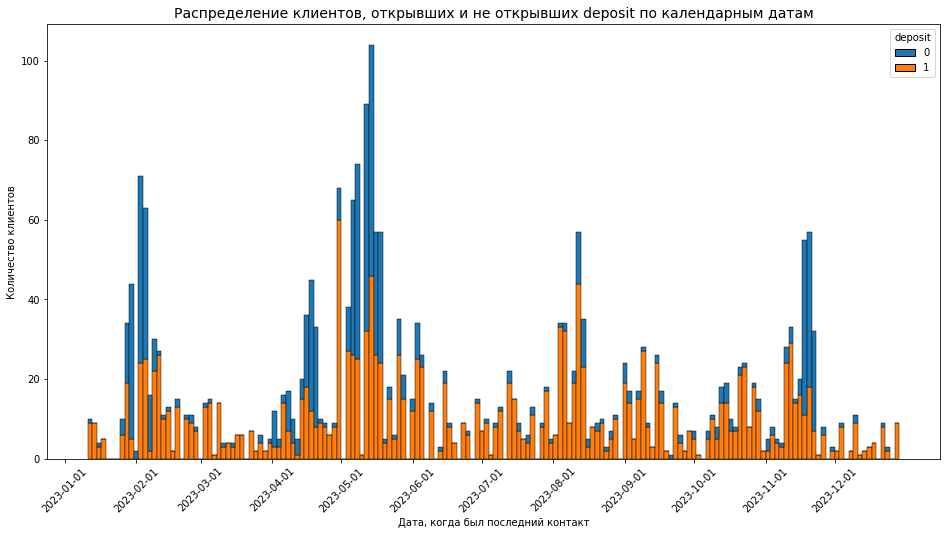

### Признак `ringing_type` (тип прозвона)

Посмотрим на распределение признака `ringing_type` в разрезе целевой переменной `deposit`.

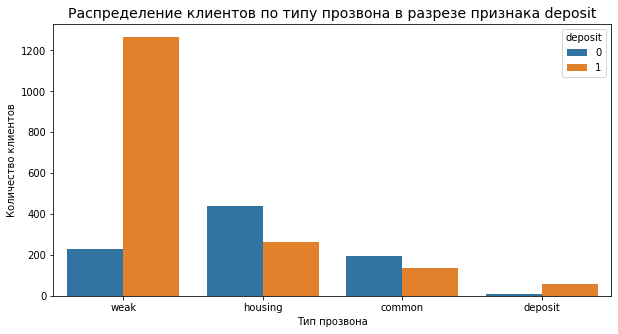

### Признак `job_loyal` (уровень лояльности к предложению открыть депозит в зависимости от сферы занятости)

Посмотрим на распределение признака `job_loyal` в разрезе целевой переменной `deposit`.

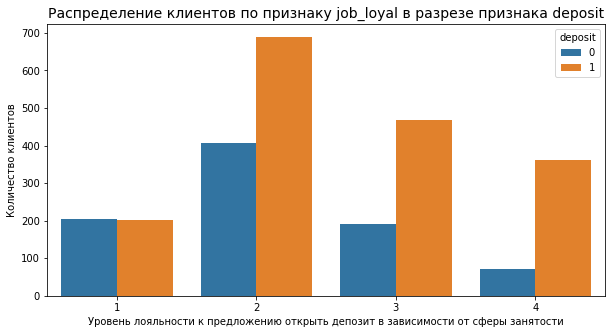

In [4]:
# Добавим к новым признакам информацию о целевой переменной
new_features = copy(prepareData.new_features)
new_features.append(TARGET_FEATURE)

display_fields_distribution_by_target(data_participated[new_features])

### Дополнительное исследование распределения признака `contact_date`

Посмотрим на распределение признака `contact_date` с помощью `plotly`, чтобы увидеть точные даты.

In [23]:
fig1 = px.histogram(
    data_participated, 
    x='contact_date', 
    color='deposit', 
    nbins=365,
    title='Распределение клиентов, открывших и не открывших депозит, по календарным датам', 
)
fig1.show()

Видно, что в определенные даты клиентам звонили явно чаще, в другие реже.

In [25]:
fig2 = px.histogram(
    data_participated, 
    x='contact_date', 
    color='housing', 
    nbins=365,
    title='Распределение клиентов, взявших и не взявших кредит на жилье, по календарным датам', 
)
fig2.show()

Можно заметить, что в определенные промежутки времени звонков (например, в начале мая) \
у многих клиентов оформлен кредит на жилье.\
По графику выше видно, что депозит в эти даты оформляли явно реже.\
Можно предположить, что в определенные промежутки времени были тематические прозвоны, и в зависимости от типа прозвона клиенты принимали либо одно, либо другое предложение.

Код для формирования признака с предполагаемым типом прозвона (`ringing_type`) \
вынесен в метод `get_ringing_type` класса [PrepareDataParticipated](./classes/PrepareDataParticipated.py).

## Исследование корреляции новых признаков <a id="item_correlation"></a>

### Построение матрицы корреляции и диаграммы корреляции признаков с целевой переменной `deposit` <a id="item_correlation_by_target"></a>

Построим матрицу корреляции.

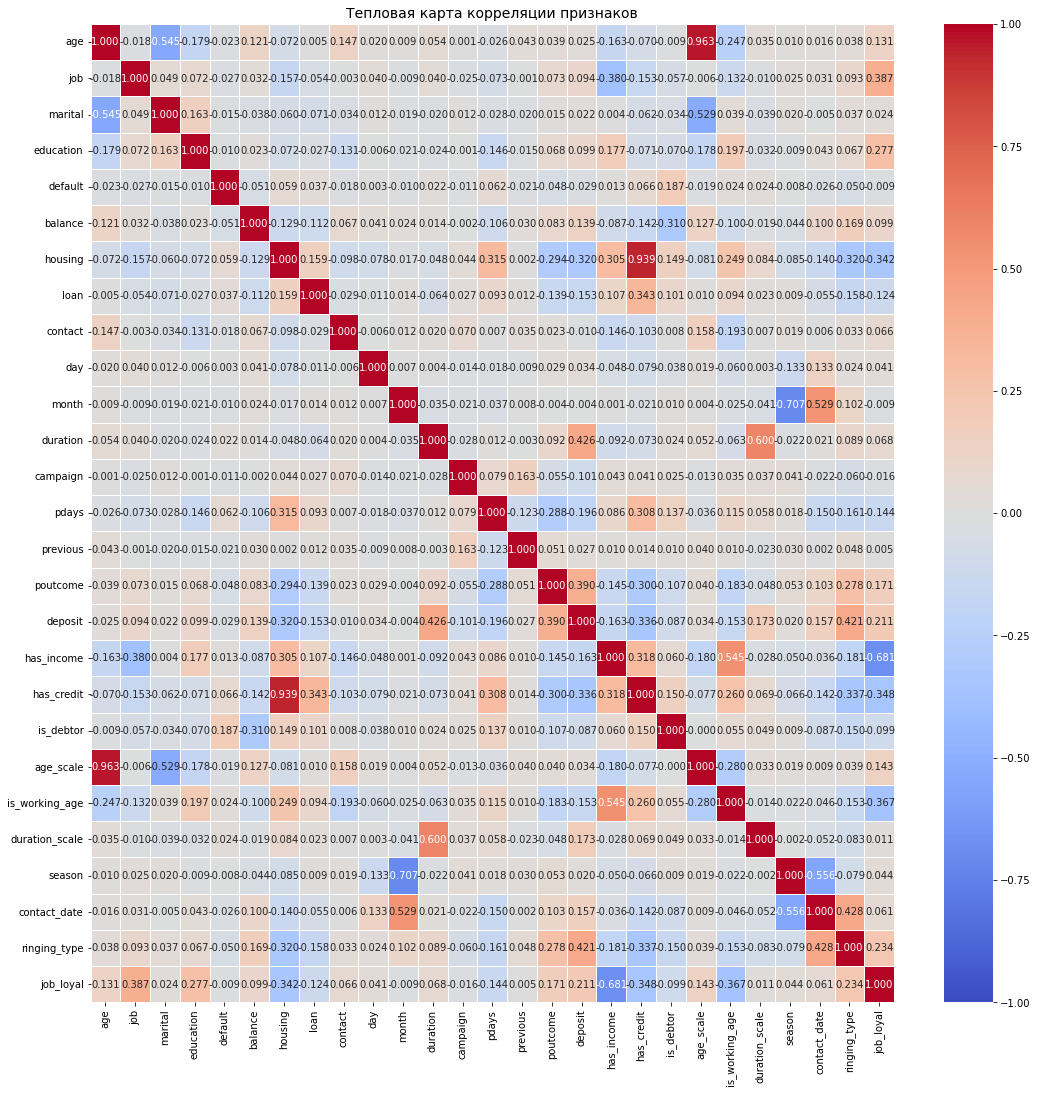

Посмотрим на пары признаков с коэффициентом корреляции больше, чем `0.3`

[(['age', 'marital'], -0.54),
 (['age', 'age_scale'], 0.96),
 (['job', 'has_income'], -0.38),
 (['job', 'job_loyal'], 0.39),
 (['marital', 'age_scale'], -0.53),
 (['balance', 'is_debtor'], -0.31),
 (['housing', 'pdays'], 0.32),
 (['housing', 'deposit'], -0.32),
 (['housing', 'has_credit'], 0.94),
 (['housing', 'ringing_type'], -0.32),
 (['housing', 'job_loyal'], -0.34),
 (['loan', 'has_credit'], 0.34),
 (['month', 'season'], -0.71),
 (['month', 'contact_date'], 0.53),
 (['duration', 'deposit'], 0.43),
 (['duration', 'duration_scale'], 0.6),
 (['pdays', 'has_credit'], 0.31),
 (['poutcome', 'deposit'], 0.39),
 (['deposit', 'has_credit'], -0.34),
 (['deposit', 'ringing_type'], 0.42),
 (['has_income', 'has_credit'], 0.32),
 (['has_income', 'is_working_age'], 0.55),
 (['has_income', 'job_loyal'], -0.68),
 (['has_credit', 'ringing_type'], -0.34),
 (['has_credit', 'job_loyal'], -0.35),
 (['is_working_age', 'job_loyal'], -0.37),
 (['season', 'contact_date'], -0.56),
 (['contact_date', 'ringing

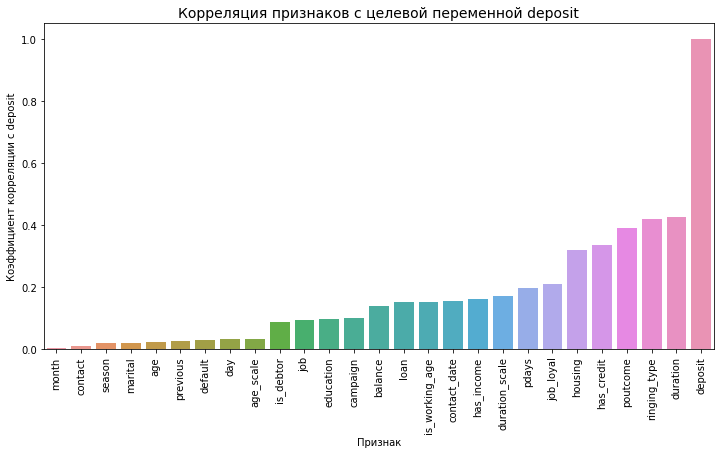

In [7]:
# Для построения матрицы корреляции к столбцам с типом `object` 
# применим порядковое кодирование с помощью `LabelEncoder`

# Сделаем копию таблицы
data_participated_le = data_participated.copy()

# Переведем признак contact_date в строковый
data_participated_le['contact_date'] = data_participated_le['contact_date'].astype(str)

# Перекодируем значения
data_participated_le = get_data_with_label_encoded_columns(data_participated_le)

display_fields_correlation(data_participated_le, 0.3, 'spearman')

**Рассмотрим взаимосвязь некоторых признаков.**

<a id="item_relation_income_credit"></a>

### Взаимосвязь признаков `has_income` и `has_credit`

Вспомним описание признаков:

- `has_income` - имеется ли доход у клиента

- `has_credit` - имеется ли кредит у клиента

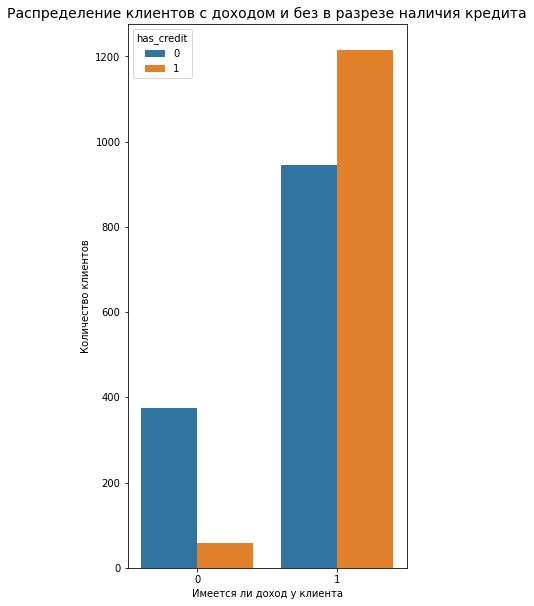

In [8]:
display_relationship_features(
    data_participated,
    'has_income',
    feature_target='has_credit',
    title='Распределение клиентов с доходом и без в разрезе наличия кредита',
)

Чаще берут кредиты клиенты, у которых есть доход.

<a id="item_relation_age_income"></a>

### Взаимосвязь признаков `is_working_age` и `has_income`

Вспомним описание признаков:

- `is_working_age` - является ли возраст клиента рабочим

- `has_income` - имеется ли доход у клиента

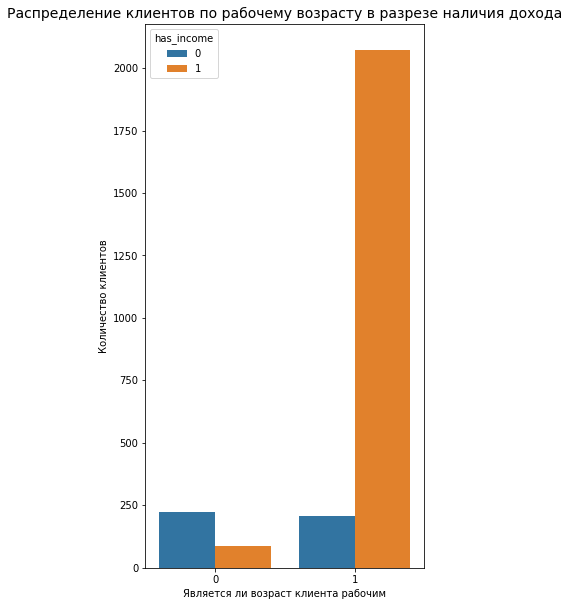

In [9]:
display_relationship_features(
    data_participated,
    'is_working_age',
    feature_target='has_income',
    title='Распределение клиентов по рабочему возрасту в разрезе наличия дохода',
)

Клиенты в рабочем возрасте чаще имеют доход (что ожидаемо).

## Кодирование признаков <a id="item_encode"></a>

In [10]:
print(f'Удалим следующие столбцы: {prepareData.columns_to_drop}')

Удалим следующие столбцы: ['age', 'housing', 'loan', 'default', 'duration_scale', 'season', 'month', 'has_income', 'job', 'contact_date']


In [11]:
# Обновим данные
prepareData.update_data(data_source)

# Перекодируем столбцы
prepareData.encoded_specific_columns()

# Получим таблицу с перекодированными столбцами
data_participated_encoded = prepareData.get_data()

Посмотрим на пары признаков с коэффициентом корреляции больше, чем `0.3`

[(['marital', 'age_scale'], 0.41),
 (['balance', 'is_debtor'], -0.31),
 (['duration', 'deposit'], 0.43),
 (['pdays', 'has_credit'], 0.31),
 (['deposit', 'has_credit'], -0.34),
 (['deposit', 'poutcome_failure'], -0.31),
 (['deposit', 'poutcome_success'], 0.41),
 (['deposit', 'ringing_type_housing'], -0.37),
 (['deposit', 'ringing_type_weak'], 0.45),
 (['has_credit', 'job_loyal'], -0.35),
 (['has_credit', 'ringing_type_housing'], 0.42),
 (['has_credit', 'ringing_type_weak'], -0.4),
 (['is_working_age', 'job_loyal'], -0.37),
 (['poutcome_failure', 'poutcome_other'], -0.43),
 (['poutcome_failure', 'poutcome_success'], -0.68),
 (['poutcome_other', 'poutcome_success'], -0.38),
 (['poutcome_success', 'ringing_type_weak'], 0.31),
 (['ringing_type_common', 'ringing_type_weak'], -0.45),
 (['ringing_type_housing', 'ringing_type_weak'], -0.71)]

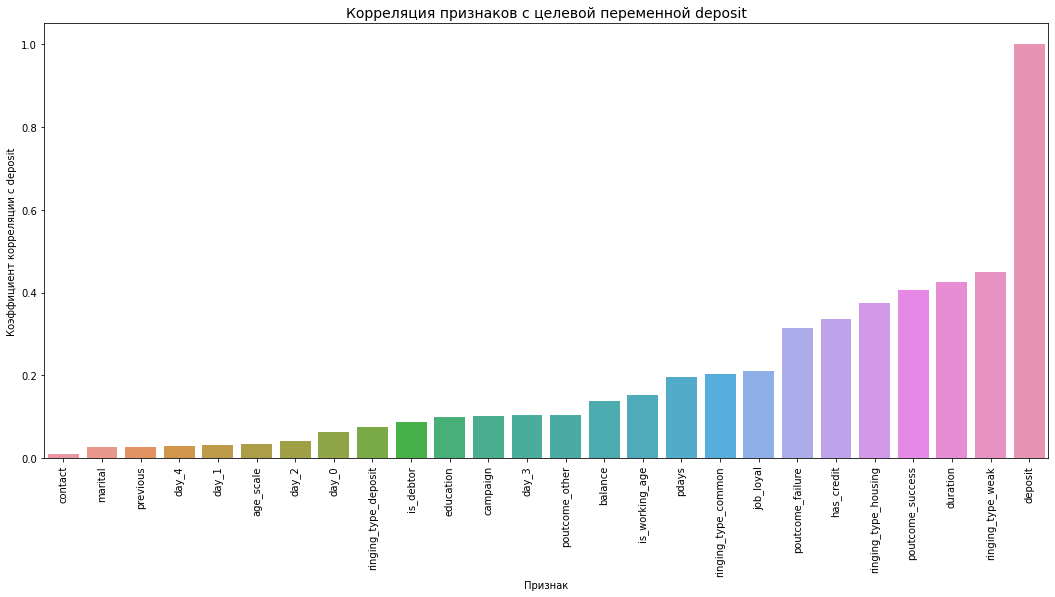

In [13]:
display_fields_correlation(
    data_participated_encoded, 
    0.3,
    'spearman',
    False,
    (18, 8),
)

## Отбор лучших признаков с помощью `SelectKBest` <a id="item_select"></a>

In [14]:
# Получим данные тренировочной и тестовой выборок
X_train, X_test, y_train, y_test = get_samples(data_participated_encoded)

In [16]:
# Определим ценность признаков
selector = SelectKBest(score_func=f_classif, k=prepareData.best_features_count)
selector.fit(X_train, y_train)
best_features = selector.get_feature_names_out()

**Значения оценок признаков, определенные SelectKBest**

,name,score
19,ringing_type_weak,575.737688
15,poutcome_success,432.020045
18,ringing_type_housing,376.132779
8,has_credit,283.037944
4,duration,228.797834
13,poutcome_failure,220.200940
12,job_loyal,99.547382
16,ringing_type_common,78.223484
6,pdays,47.136827
11,is_working_age,44.894818


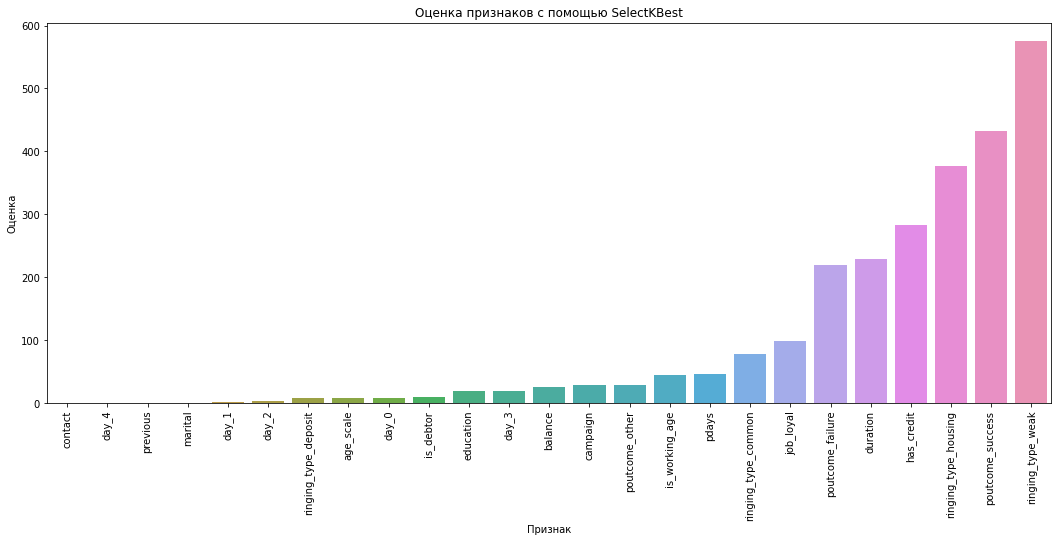

In [17]:
display_best_features(selector)

In [18]:
# Выделим лучше признаки из выборок
X_train = X_train[best_features]
X_test = X_test[best_features]

## Нормализация признаков <a id="item_normalize"></a>

In [19]:
# Посмотрим на характеристики распределения признаков на тренировочной выборке
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
education,1945.0,2.268380,0.630951,1.0,2.0,2.0,3.0,3.0
balance,1945.0,1025.859640,1129.715258,-1137.0,183.0,598.0,1568.0,4761.0
duration,1945.0,339.839589,279.550273,4.0,159.0,259.0,433.0,2062.0
campaign,1945.0,1.891517,1.313923,1.0,1.0,1.0,2.0,12.0
pdays,1945.0,207.505913,123.535812,1.0,98.0,182.0,291.0,854.0
has_credit,1945.0,0.501799,0.500125,0.0,0.0,1.0,1.0,1.0
is_debtor,1945.0,0.035990,0.186312,0.0,0.0,0.0,0.0,1.0
age_scale,1945.0,4.611825,1.302879,2.0,4.0,4.0,5.0,10.0
is_working_age,1945.0,0.881234,0.323596,0.0,1.0,1.0,1.0,1.0
job_loyal,1945.0,2.427249,0.934026,1.0,2.0,2.0,3.0,4.0


In [20]:
# Для нормализации признаков воспользуемся MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)

X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [21]:
# Посмотрим на характеристики распределения после нормализации
pd.DataFrame(X_train_scaled, columns=X_train.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
education,1945.0,0.634190,0.315476,0.0,0.500000,0.500000,1.000000,1.0
balance,1945.0,0.366711,0.191542,0.0,0.223805,0.294168,0.458630,1.0
duration,1945.0,0.163187,0.135836,0.0,0.075316,0.123907,0.208455,1.0
campaign,1945.0,0.081047,0.119448,0.0,0.000000,0.000000,0.090909,1.0
pdays,1945.0,0.242094,0.144825,0.0,0.113716,0.212192,0.339977,1.0
has_credit,1945.0,0.501799,0.500125,0.0,0.000000,1.000000,1.000000,1.0
is_debtor,1945.0,0.035990,0.186312,0.0,0.000000,0.000000,0.000000,1.0
age_scale,1945.0,0.326478,0.162860,0.0,0.250000,0.250000,0.375000,1.0
is_working_age,1945.0,0.881234,0.323596,0.0,1.000000,1.000000,1.000000,1.0
job_loyal,1945.0,0.475750,0.311342,0.0,0.333333,0.333333,0.666667,1.0


Операции по подготовке данных к обработке моделью продублированы \
в методе `get_specific_data_for_model` класса [PrepareDataParticipated](./classes/PrepareDataParticipated.py)

In [2]:
navigation.display_backlink()

**Вернуться к файлу &laquo;[Главная](./1_main.ipynb)&raquo;**